# Pattern Recognition and Machine Learning
## Week 3 Tutorial

### 1. Read a csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploring the dataset
iris = pd.read_csv("data/iris.data", sep=',', names=["sepal_length",
                                                     "sepal_width",
                                                     "petal_length",
                                                     "petal_width",
                                                     "species"])

### 2. Explore the data

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
iris["species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

### 3. Visualize data using Matplotlib

In [7]:
import seaborn as sns

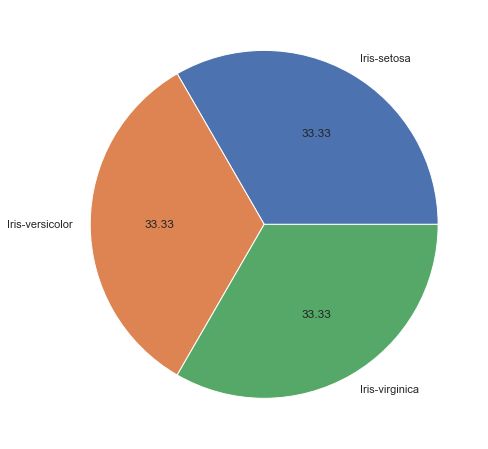

In [11]:
# pie chart
iplot = iris["species"].value_counts()\
                       .plot(kind='pie', autopct="%.2f", figsize=(8, 8))
iplot.set_ylabel('')
iplot.set_facecolor('white')

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

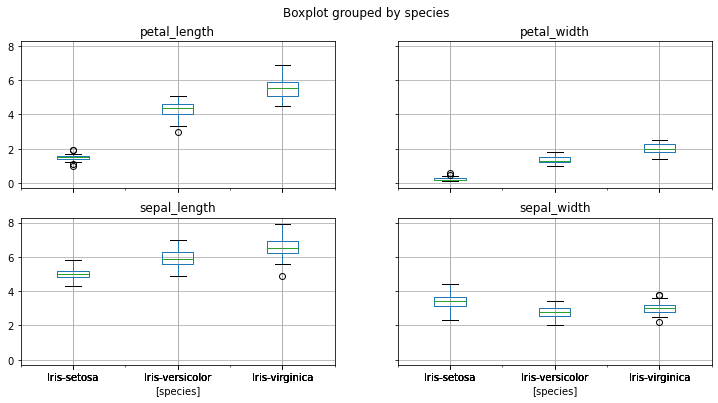

In [9]:
# boxplot
iris.boxplot(by="species", figsize=(12, 6))

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

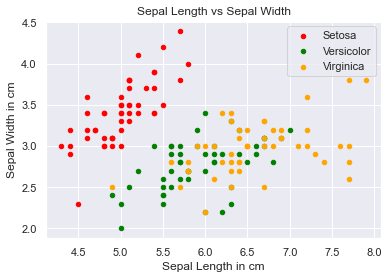

In [10]:
# scatterplot
sns.set(style='darkgrid')
sc = iris[iris.species == "Iris-setosa"].plot(kind='scatter', x="sepal_length",
                                              y="sepal_width", color='red',
                                              label="Setosa")

iris[iris.species == "Iris-versicolor"].plot(kind='scatter', x="sepal_length",
                                              y="sepal_width", color='green',
                                              label="Versicolor", ax=sc)

iris[iris.species == "Iris-virginica"].plot(kind='scatter', x="sepal_length",
                                              y="sepal_width", color='orange',
                                              label="Virginica", ax=sc)


sc.set_xlabel("Sepal Length in cm")
sc.set_ylabel("Sepal Width in cm")
sc.set_title("Sepal Length vs Sepal Width")

### 4. Linear regression on a multi-variable dataset

In [12]:
import numpy as np

# metrics to evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error

# split the dataset into train/test sets
from sklearn.model_selection import train_test_split

# import linear regression
from sklearn.linear_model import LinearRegression

In [27]:
# drop petal width from dataset
X = iris.drop(labels=["petal_width", "species"], axis='columns')

# correct values
y = iris["petal_width"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

In [24]:
X_train.shape

(112, 3)

In [25]:
X_test.shape

(38, 3)

In [28]:
lre = LinearRegression()

# train the model
lre.fit(X_train, y_train)

# make a prediction
result = lre.predict(X_test)

# evaluate the result
print("Mean Absolute Error:", mean_absolute_error(y_test, result))
print("Mean Squared Error:", mean_squared_error(y_test, result))
print("Mean Squared Root Error:", np.sqrt(mean_squared_error(y_test, result)))
abs(y_test - result)

Mean Absolute Error: 0.16984559986869166
Mean Squared Error: 0.04891659158847788
Mean Squared Root Error: 0.22117095557165248


14     0.159520
98     0.281378
75     0.071378
16     0.222544
131    0.310520
56     0.060599
141    0.635353
44     0.165795
29     0.141391
120    0.273331
94     0.106471
5      0.000338
102    0.071768
51     0.005781
78     0.020076
42     0.055947
92     0.012853
66     0.156731
31     0.249602
35     0.163206
90     0.317451
84     0.211209
77     0.064295
40     0.124387
125    0.312113
99     0.051211
33     0.089037
19     0.042914
73     0.376578
146    0.293838
91     0.176257
135    0.323761
69     0.083910
128    0.103656
114    0.518825
48     0.060736
53     0.088530
28     0.050844
Name: petal_width, dtype: float64

Text(0.5, 0, 'Sepal Length')

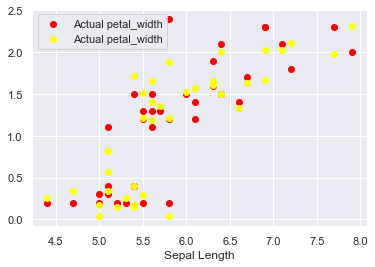

In [29]:
# visualize the result
plt.scatter(X_test[["sepal_length"]], y_test,
            color="red", label = "Actual petal_width")
plt.scatter(X_test[["sepal_length"]], result,
            color="yellow", label = "Actual petal_width")
plt.legend()
plt.xlabel("Sepal Length")

In [39]:
compare = pd.DataFrame(y_test)
compare["predict"] = np.round(result, 1)
compare["bias"] = compare["petal_width"] - compare["predict"]

print(compare)

     petal_width  predict  bias
14           0.2      0.0   0.2
98           1.1      0.8   0.3
75           1.4      1.3   0.1
16           0.4      0.2   0.2
131          2.0      2.3  -0.3
56           1.6      1.7  -0.1
141          2.3      1.7   0.6
44           0.4      0.6  -0.2
29           0.2      0.3  -0.1
120          2.3      2.0   0.3
94           1.3      1.4  -0.1
5            0.4      0.4   0.0
102          2.1      2.0   0.1
51           1.5      1.5   0.0
78           1.5      1.5   0.0
42           0.2      0.3  -0.1
92           1.2      1.2   0.0
66           1.5      1.7  -0.2
31           0.4      0.2   0.2
35           0.2      0.0   0.2
90           1.2      1.5  -0.3
84           1.5      1.7  -0.2
77           1.7      1.6   0.1
40           0.3      0.2   0.1
125          1.8      2.1  -0.3
99           1.3      1.4  -0.1
33           0.2      0.3  -0.1
19           0.3      0.3   0.0
73           1.2      1.6  -0.4
146          1.9      1.6   0.3
91      

### 5. Linear regression on Wine Quality dataset

In [40]:
# load wine dataset
wine_red_data = pd.read_csv("data/winequality-red.csv", sep=';')
wine_white_data = pd.read_csv("data/winequality-white.csv", sep=';')

wine_dataset = pd.concat([wine_red_data, wine_white_data])

In [48]:
wine_dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
list(wine_dataset.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [49]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [43]:
# drop quality width from dataset
X = wine_dataset.drop(columns="quality")

# correct values
y = wine_dataset["quality"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

In [44]:
lre = LinearRegression()

# train the model
lre.fit(X_train, y_train)

# make a prediction
result = lre.predict(X_test)

# evaluate the result
print("Mean Absolute Error:", mean_absolute_error(y_test, result))
print("Mean Squared Error:", mean_squared_error(y_test, result))
print("Mean Squared Root Error:", np.sqrt(mean_squared_error(y_test, result)))
# abs(y_test - result)

Mean Absolute Error: 0.5676775486620523
Mean Squared Error: 0.5262894661062998
Mean Squared Root Error: 0.7254581077541968


In [45]:
# compare result
print(pd.DataFrame({"Actual": y_test, "Predict": result}))

      Actual   Predict
2173       5  5.656515
4410       5  5.485767
1865       6  5.525008
1518       5  5.597992
2162       6  5.036467
...      ...       ...
2677       6  6.198455
3683       6  6.461856
2255       6  5.688918
1759       5  5.121833
4267       7  6.455391

[1625 rows x 2 columns]


In [46]:
# print weight and coefficient
print(lre.intercept_)
print(lre.coef_)

54.058003854665635
[ 5.55618691e-02 -1.29945358e+00 -1.08205046e-01  4.52070539e-02
 -3.95901596e-01  5.76479819e-03 -2.47760359e-03 -5.30023471e+01
  3.50283862e-01  7.49149475e-01  2.78530060e-01]


Text(0.5, 0, 'Volatile Acidity')

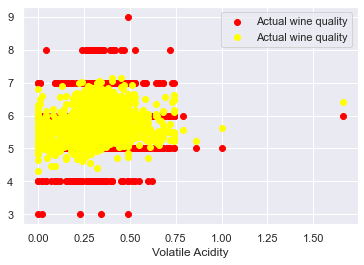

In [47]:
# visualize the result
plt.scatter(X_test[["citric acid"]], y_test,
            color="red", label = "Actual wine quality")
plt.scatter(X_test[["citric acid"]], result,
            color="yellow", label = "Actual wine quality")
plt.legend()
plt.xlabel("Volatile Acidity")

## Question:
1. Investigate an effect of testing size to model’s performance;
2. Build a model to train and make a prediction for your selected dataset.

In [51]:
X = wine_dataset.drop(["quality", "pH", "alcohol", "residual sugar"],
                      axis="columns")

y = wine_dataset["quality"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

In [52]:
lre = LinearRegression()

# train the model
lre.fit(X_train, y_train)

# make a prediction
result = lre.predict(X_test)

# evaluate the result
print("Mean Absolute Error:", mean_absolute_error(y_test, result))
print("Mean Squared Error:", mean_squared_error(y_test, result))
print("Mean Squared Root Error:", np.sqrt(mean_squared_error(y_test, result)))
# abs(y_test - result)

Mean Absolute Error: 0.6006065892501363
Mean Squared Error: 0.5898444941007395
Mean Squared Root Error: 0.7680133423976041


In [53]:
# compare result
compare = pd.DataFrame({"Actual": y_test, "Predict": result})
compare["bias"] = compare["Actual"] - compare["Predict"]
print(compare)

      Actual   Predict      bias
2173       5  5.487041 -0.487041
4410       5  5.696520 -0.696520
1865       6  4.901043  1.098957
1518       5  5.624084 -0.624084
2162       6  5.421476  0.578524
...      ...       ...       ...
2677       6  6.016949 -0.016949
3683       6  6.257893 -0.257893
2255       6  5.887488  0.112512
1759       5  5.343353 -0.343353
4267       7  6.072965  0.927035

[1625 rows x 3 columns]


# Modified National Institute of Standards and Technology database (MINIST)
## Using Logistic Regression to classify images of numbers in MNIST images

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits

# load images
digits = fetch_openml("mnist_784")

# digits = load_digits()
# print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

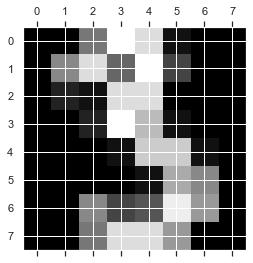

In [71]:
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

## 3 Exploring Data
### 3.1 Show the image and data

ValueError: cannot reshape array of size 64 into shape (38,38)

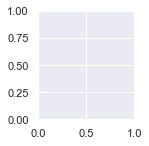

In [74]:
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(digits.data[0:5],
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % int(label), fontsize = 15)

### 3.2 Show the corresponding matrix

In [72]:
# show corresponding matrix
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## 4 Build a Logistic model to classify MNIST images

In [59]:
from sklearn.metrics import confusion_matrix

### 4.2 Step 1: Select target variable

In [58]:
y = digits.target
y[0]

'5'

### 4.3 Step 2: Prepare data

In [56]:
n_samples = len(digits.data)
n_samples

70000

In [57]:
X = digits.data
X.shape

(70000, 784)

In [61]:
print(X)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

### 4.4 Step 3: Split dataset

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

### 4.5 Step 4: Select a Linear Regression classifier

In [63]:
lre = LogisticRegression(solver = 'lbfgs')

### 4.6 Step 5: Fit the data

In [64]:
lre.fit(X_train, y_train)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 4.7 Step 6: Predict on test data

In [ ]:
result = lre.predict(X_train)

### Measuring Model Performance:
accuracy (fraction of correct predictions) =
correct predictions / total number of data points

In [ ]:
score = lre.score(X_test, y_test)
print(score)

### 4.8 Step 7: Create confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)